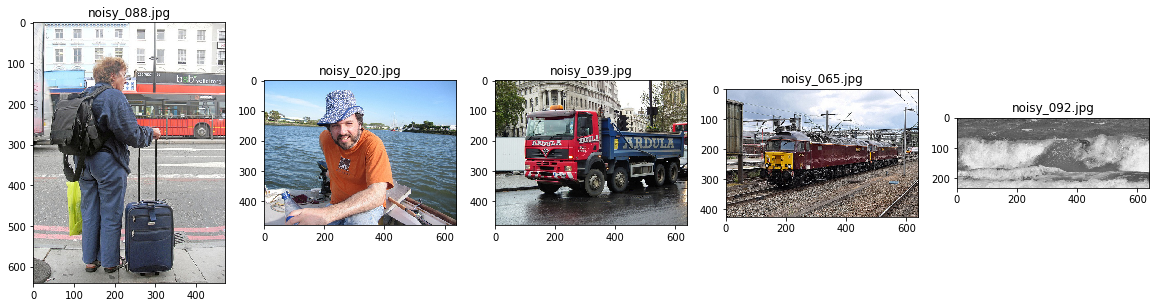

Found 150 files belonging to 1 classes.
['Photo']


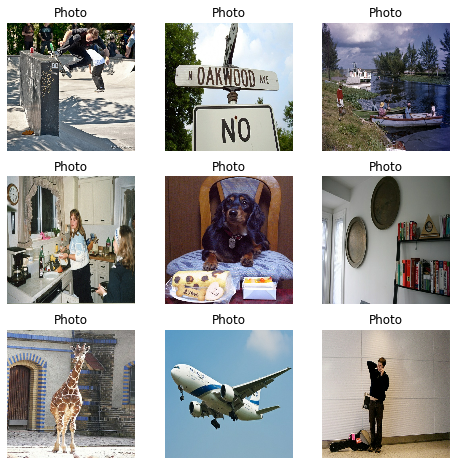

In [1]:
%run img_loading.ipynb

In [2]:
def noisy(img):
    img_resc = [pix*1./255 for pix in img]
    row,col,ch= img.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = img_resc + gauss
    return noisy

In [3]:
def display_img(img):
    plt.figure()
    plt.imshow(img)
    plt.grid(False)
    plt.axis("off")
    plt.show()

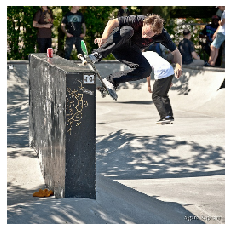

In [4]:
display_img(images[0].numpy().astype("uint8"))

In [5]:
ub_ds=ds.unbatch()
X_train = []
Y_train = []
for element in ub_ds.as_numpy_iterator():
    X_train.append(noisy(element[0]))
    Y_train.append(element[0])
    
X_train=np.array(X_train)
Y_train=np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(150, 256, 256, 3)
(150, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


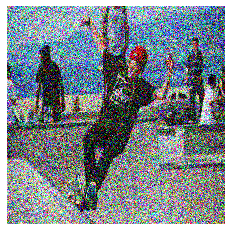

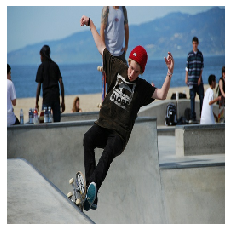

In [6]:
display_img(X_train[0])
display_img(Y_train[0].astype("uint8"))

In [7]:
input_img = keras.Input(shape=(256,256,3))
encoded = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
encoded = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)

In [8]:
decoded = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = keras.layers.UpSampling2D((2, 2))(decoded)
decoded = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(decoded)
output_img = keras.layers.Conv2D(3, (3, 3), activation='relu', padding='same')(decoded)

In [9]:
autoencoder = keras.Model(input_img, output_img, name="AutoEncodeur")

In [10]:
autoencoder.summary()

Model: "AutoEncodeur"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)       

In [11]:
reconstruction_loss = keras.losses.binary_crossentropy(input_img, output_img) * 256

autoencoder_loss = keras.backend.mean(reconstruction_loss)

In [12]:
autoencoder.add_loss(autoencoder_loss)
autoencoder.compile(optimizer="adam")

In [13]:
epochs = 400
batch = 10

# Exécution du modèle
history = autoencoder.fit(X_train, Y_train,epochs=epochs, batch_size=batch, shuffle=True)

Epoch 1/400
15/15 [==============================] - 151s 10s/step - loss: 453.4461
Epoch 2/400
15/15 [==============================] - 149s 10s/step - loss: 179.6156
Epoch 3/400
15/15 [==============================] - 148s 10s/step - loss: 166.7157
Epoch 4/400
15/15 [==============================] - 147s 10s/step - loss: 153.3435
Epoch 5/400
15/15 [==============================] - 148s 10s/step - loss: 149.3620
Epoch 6/400
15/15 [==============================] - 156s 10s/step - loss: 146.8972
Epoch 7/400
15/15 [==============================] - 140s 9s/step - loss: 154.1536
Epoch 8/400
15/15 [==============================] - 100s 7s/step - loss: 153.9509
Epoch 9/400
15/15 [==============================] - 100s 7s/step - loss: 150.3803
Epoch 10/400
15/15 [==============================] - 100s 7s/step - loss: 148.2364
Epoch 11/400
15/15 [==============================] - 106s 7s/step - loss: 173.2054
Epoch 12/400
15/15 [==============================] - 100s 7s/step - loss: 151.

15/15 [==============================] - 110s 7s/step - loss: 142.2942
Epoch 99/400
15/15 [==============================] - 110s 7s/step - loss: 145.0480
Epoch 100/400
15/15 [==============================] - 109s 7s/step - loss: 142.6675
Epoch 101/400
15/15 [==============================] - 109s 7s/step - loss: 143.2602
Epoch 102/400
15/15 [==============================] - 108s 7s/step - loss: 149.1655
Epoch 103/400
15/15 [==============================] - 106s 7s/step - loss: 143.8380
Epoch 104/400
15/15 [==============================] - 95s 6s/step - loss: 144.3120
Epoch 105/400
15/15 [==============================] - 107s 7s/step - loss: 147.3313
Epoch 106/400
15/15 [==============================] - 103s 7s/step - loss: 143.3341
Epoch 107/400
15/15 [==============================] - 105s 7s/step - loss: 166.1156
Epoch 108/400
15/15 [==============================] - 104s 7s/step - loss: 162.4679
Epoch 109/400
15/15 [==============================] - 104s 7s/step - loss: 145.9

15/15 [==============================] - 98s 7s/step - loss: 141.7849
Epoch 195/400
15/15 [==============================] - 98s 7s/step - loss: 141.3707
Epoch 196/400
15/15 [==============================] - 99s 7s/step - loss: 141.5648
Epoch 197/400
15/15 [==============================] - 98s 7s/step - loss: 141.5039
Epoch 198/400
15/15 [==============================] - 98s 7s/step - loss: 145.8939
Epoch 199/400
15/15 [==============================] - 98s 7s/step - loss: 143.1029
Epoch 200/400
15/15 [==============================] - 98s 7s/step - loss: 141.8356
Epoch 201/400
15/15 [==============================] - 98s 7s/step - loss: 141.6463
Epoch 202/400
15/15 [==============================] - 99s 7s/step - loss: 141.5662
Epoch 203/400
15/15 [==============================] - 98s 7s/step - loss: 141.3080
Epoch 204/400
15/15 [==============================] - 99s 7s/step - loss: 142.0869
Epoch 205/400
15/15 [==============================] - 99s 7s/step - loss: 141.5768
Epoch 

15/15 [==============================] - 100s 7s/step - loss: 142.1598
Epoch 292/400
15/15 [==============================] - 101s 7s/step - loss: 141.1452
Epoch 293/400
15/15 [==============================] - 100s 7s/step - loss: 141.5490
Epoch 294/400
15/15 [==============================] - 99s 7s/step - loss: 142.0338
Epoch 295/400
15/15 [==============================] - 98s 7s/step - loss: 141.5487
Epoch 296/400
15/15 [==============================] - 99s 7s/step - loss: 142.3768
Epoch 297/400
15/15 [==============================] - 99s 7s/step - loss: 144.1618
Epoch 298/400
15/15 [==============================] - 99s 7s/step - loss: 144.9862
Epoch 299/400
15/15 [==============================] - 99s 7s/step - loss: 142.6514
Epoch 300/400
15/15 [==============================] - 99s 7s/step - loss: 141.2889
Epoch 301/400
15/15 [==============================] - 99s 7s/step - loss: 140.9007
Epoch 302/400
15/15 [==============================] - 99s 7s/step - loss: 140.6100
Epo

15/15 [==============================] - 99s 7s/step - loss: 142.1926
Epoch 389/400
15/15 [==============================] - 100s 7s/step - loss: 142.1174
Epoch 390/400
15/15 [==============================] - 100s 7s/step - loss: 141.7640
Epoch 391/400
15/15 [==============================] - 100s 7s/step - loss: 141.9693
Epoch 392/400
15/15 [==============================] - 100s 7s/step - loss: 141.1441
Epoch 393/400
15/15 [==============================] - 99s 7s/step - loss: 140.5261
Epoch 394/400
15/15 [==============================] - 103s 7s/step - loss: 140.3022
Epoch 395/400
15/15 [==============================] - 103s 7s/step - loss: 140.6936
Epoch 396/400
15/15 [==============================] - 105s 7s/step - loss: 140.9870
Epoch 397/400
15/15 [==============================] - 103s 7s/step - loss: 140.4040
Epoch 398/400
15/15 [==============================] - 105s 7s/step - loss: 140.5259
Epoch 399/400
15/15 [==============================] - 104s 7s/step - loss: 140.7

In [14]:
autoencoder.save_weights('./autoencoder-weights.h5')

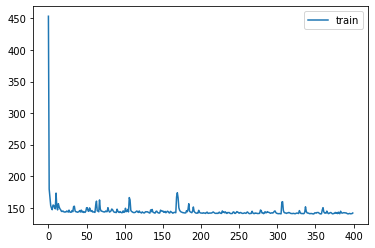

In [15]:
plt.plot(history.history['loss'], label='train')
plt.legend()

In [16]:
X_train[1].shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


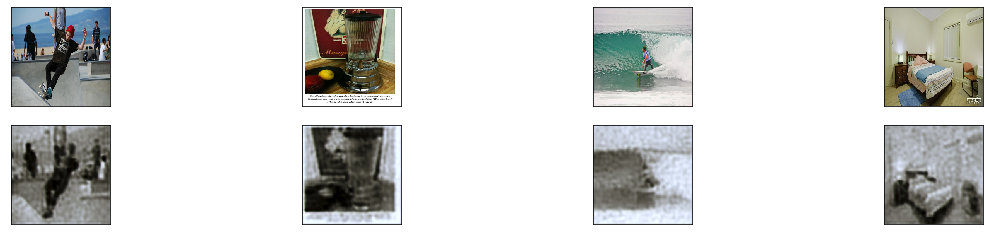

In [17]:
n = 4
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(Y_train[i].astype("uint8"))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    desoined_img = autoencoder.predict(np.array([X_train[i]]))
    plt.imshow(desoined_img[0,:,:,:])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()